In [1]:
import pandas as pd
import matplotlib.pyplot as mat
import numpy as np
import seaborn as sns
df=pd.read_csv("haberman.csv")


In [2]:
print(df.shape)


(306, 4)


so our data matrix has 306 rows and 4 columns

In [3]:
print(df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


the colums are listed above
So we have total 306 dataponts and 3 featues/columns and 1 class label

In [4]:
print(df['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


- its a binary class dataset . Class label is status and it takes 2 values - 1 and 2
- class 1 has 225 points and class 2 has 81 points
- objective : Our objective is to perfoorm exploratory data analysis over this haberman dataset

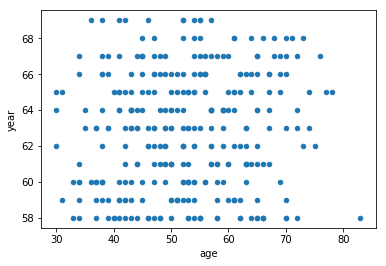

In [5]:
df.plot(kind='scatter',x='age',y='year')
mat.show()

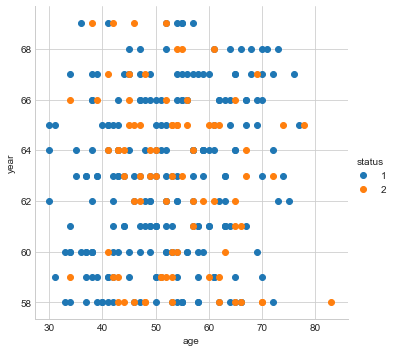

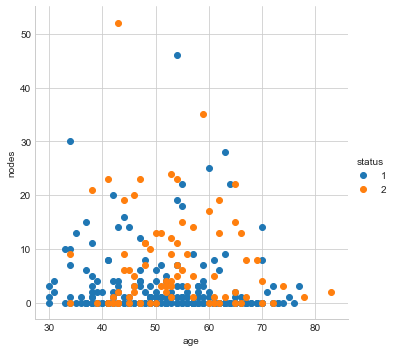

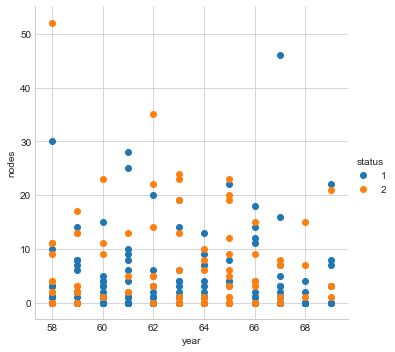

In [6]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=5) \
   .map(mat.scatter, "age", "year") \
   .add_legend();
mat.show();
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=5) \
   .map(mat.scatter, "age", "nodes") \
   .add_legend();
mat.show();
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=5) \
   .map(mat.scatter, "year", "nodes") \
   .add_legend();
mat.show();


From the scatter plot we cannot draw any conclusions . Points are randomly mixed . No plane/line can be found to  sistinguish among the classes

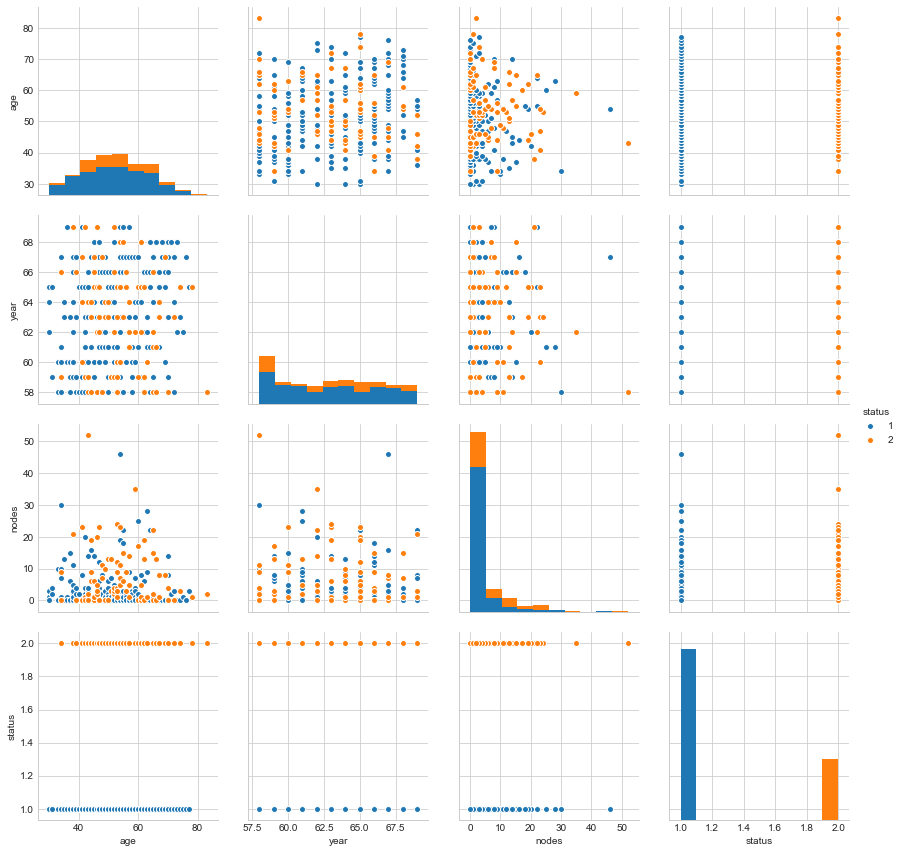

In [10]:

mat.close(); 
sns.set_style("whitegrid"); 
sns.pairplot(df, hue="status", size=3);
mat.show()

from pair plots also , not much help can be drawn for classification as points are not linearly seperable

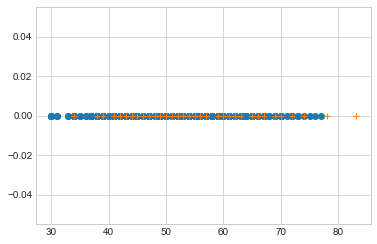

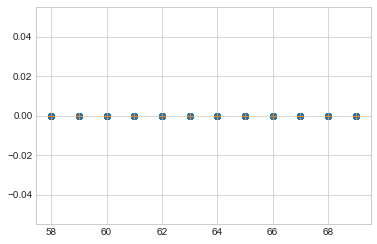

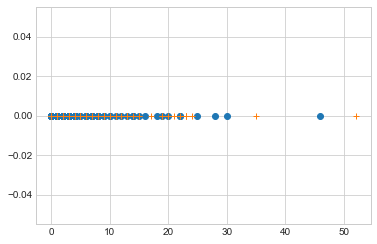

In [11]:
import numpy as np
df_1 = df.loc[df["status"] == 1];
df_2 = df.loc[df["status"] == 2];
#print(df_1)
#print(df_setosa["petal_length"])
mat.plot(df_1["age"], np.zeros_like(df_1['age']), 'o')
mat.plot(df_2["age"], np.zeros_like(df_2['age']), '+')
mat.show()
mat.close()
mat.plot(df_1["year"], np.zeros_like(df_1['year']), 'o')
mat.plot(df_2["year"], np.zeros_like(df_2['year']), '+')
mat.show()
mat.close()
mat.plot(df_1["nodes"], np.zeros_like(df_1['year']), 'o')
mat.plot(df_2["nodes"], np.zeros_like(df_2['year']), '+')
mat.show()
mat.close()

again not very clear boundaries can be drawn using any of the three features . Some range conditions can be set using if-else for classificaton but it will be very teadius and infeasible

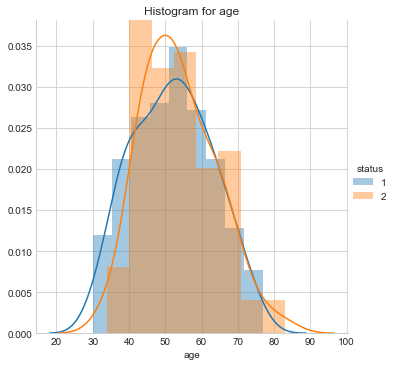

In [12]:
import warnings
warnings.filterwarnings("ignore")


sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
mat.title("Histogram for age")
mat.show();


1) chances for a patient to die at an age range of 40 to 55 , within 5 years of operation is higher than for survival
2) chances for a patient with age less than 40 to suvive more than 5 years of operation is higher as ore no of such cases are recorded

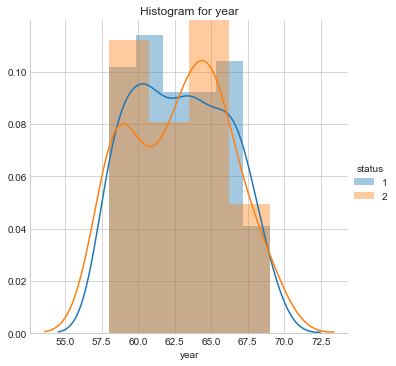

In [13]:
import warnings
warnings.filterwarnings("ignore")


sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
mat.title("Histogram for year")
mat.show();

Less patients died within 5 years of operation during the year gap of 1957 to 1963 , so more no of suceessful operations are there than failed operations . After that we see more failed operation cases as compared to success operations in consecutive years till 1966

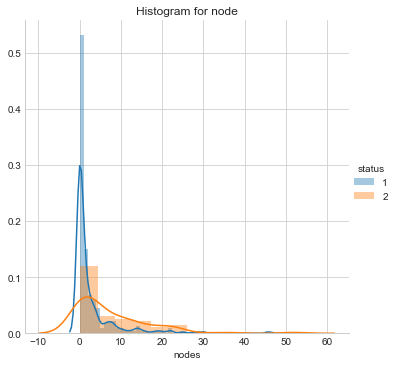

In [14]:
import warnings
warnings.filterwarnings("ignore")


sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
mat.title("Histogram for node")
mat.show();

Patients with 0 or less no of positively detected auxillary nodes are more likely to survive the operation than other patients

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


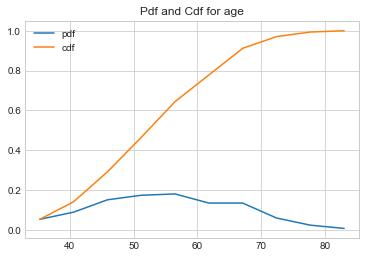

In [15]:
import warnings
warnings.filterwarnings("ignore")


counts, bin_edges = np.histogram(df['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#print("bin edges = ",bin_edges[1:])
mat.plot(bin_edges[1:],pdf,label='pdf');
mat.plot(bin_edges[1:], cdf,label='cdf')

mat.title("Pdf and Cdf for age")
mat.legend()




mat.show();

Most of the patients belong to age group 42-65 yrs

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


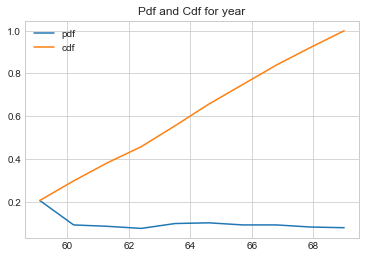

In [16]:
counts, bin_edges = np.histogram(df['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#print("bin edges = ",bin_edges[1:])
mat.plot(bin_edges[1:],pdf,label='pdf');
mat.plot(bin_edges[1:], cdf,label='cdf')
mat.legend()
mat.title("Pdf and Cdf for year")
mat.show();

there is consecutive decrease in no of patients coming to operate for breast cancer with passage of years . This can be result of better health care .

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


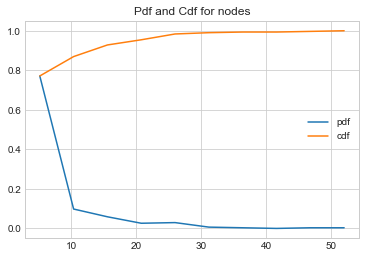

In [17]:
counts, bin_edges = np.histogram(df['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#print("bin edges = ",bin_edges[1:])
mat.plot(bin_edges[1:],pdf,label='pdf');
mat.plot(bin_edges[1:], cdf,label='cdf')
mat.legend()

mat.title("Pdf and Cdf for nodes")
mat.show();

Most of the patients approximately 85 % , are those who have less than 20 positively etected auxuillary node . And 80 % have less than 5 positively detected nodes .

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


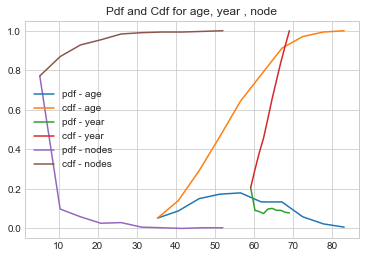

In [18]:
counts, bin_edges = np.histogram(df['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#print("bin edges = ",bin_edges[1:])
mat.plot(bin_edges[1:],pdf,label='pdf - age');
mat.plot(bin_edges[1:], cdf,label='cdf - age')

counts, bin_edges = np.histogram(df['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#print("bin edges = ",bin_edges[1:])
mat.plot(bin_edges[1:],pdf,label='pdf - year');
mat.plot(bin_edges[1:], cdf,label='cdf - year')

counts, bin_edges = np.histogram(df['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#print("bin edges = ",bin_edges[1:])
mat.plot(bin_edges[1:],pdf,label='pdf - nodes');
mat.plot(bin_edges[1:], cdf,label='cdf - nodes')

mat.legend()

mat.title("Pdf and Cdf for age, year , node")
mat.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


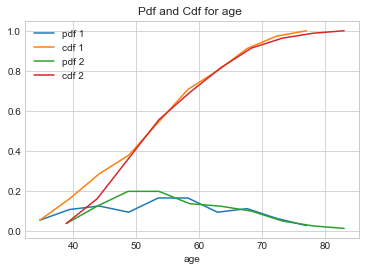

In [19]:
counts, bin_edges = np.histogram(df_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#print("bin edges = ",bin_edges[1:])
mat.plot(bin_edges[1:],pdf ,label='pdf 1')
mat.plot(bin_edges[1:], cdf ,label='cdf 1')
counts, bin_edges = np.histogram(df_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#print("bin edges = ",bin_edges[1:])
mat.plot(bin_edges[1:],pdf,label='pdf 2');
mat.plot(bin_edges[1:], cdf,label='cdf 2')

mat.legend()

mat.xlabel("age")
mat.title("Pdf and Cdf for age ")
mat.show();

patients in the age gap of 45-55 yrs are more in status 2 which shows chances / probability of their survival for more than 5 years is less .

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


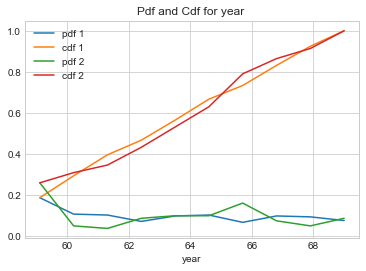

In [20]:
counts, bin_edges = np.histogram(df_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#print("bin edges = ",bin_edges[1:])
mat.plot(bin_edges[1:],pdf ,label='pdf 1')
mat.plot(bin_edges[1:], cdf ,label='cdf 1')
counts, bin_edges = np.histogram(df_2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#print("bin edges = ",bin_edges[1:])
mat.plot(bin_edges[1:],pdf,label='pdf 2');
mat.plot(bin_edges[1:], cdf,label='cdf 2')

mat.legend()
mat.xlabel("year")
mat.title("Pdf and Cdf for year ")
mat.show();


there is gradul decrease in number of patients both belonging to status 1 and status 2 with passage of years

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


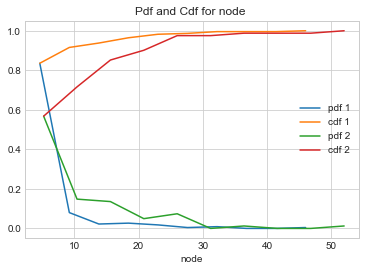

In [21]:
counts, bin_edges = np.histogram(df_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#print("bin edges = ",bin_edges[1:])
mat.plot(bin_edges[1:],pdf ,label='pdf 1')
mat.plot(bin_edges[1:], cdf ,label='cdf 1')
counts, bin_edges = np.histogram(df_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#print("bin edges = ",bin_edges[1:])
mat.plot(bin_edges[1:],pdf,label='pdf 2');
mat.plot(bin_edges[1:], cdf,label='cdf 2')

mat.legend()
mat.xlabel("node")
mat.title("Pdf and Cdf for node ")
mat.show();

if no of positively detected nodes are less than 10 ,  then no of patients surviving for more than 5 years in such a case is larger so there is better chance for a successfuloperation . Secondly if no of +vly detected nodes larger than 10 then more cases are there for ststus 2 which corresponds to failed operation

In [22]:
#Mean, Variance, Std-deviation,  
print("Means: age")
print("1 -",np.mean(df_1["age"]))
print("2 -",np.mean(df_2["age"]))

print("\nStd-dev:");
print("1 -",np.std(df_1["age"]))
print("2 -",np.std(df_2["age"]))

print("Means: year")
print("1 -",np.mean(df_1["year"]))
print("2 -",np.mean(df_2["year"]))

print("\nStd-dev:");
print("1 -",np.std(df_1["year"]))
print("2 -",np.std(df_2["year"]))

print("Means: nodes")
print("1 -",np.mean(df_1["nodes"]))
print("2 -",np.mean(df_2["nodes"]))

print("\nStd-dev:");
print("1 -",np.std(df_1["nodes"]))
print("2 -",np.std(df_2["nodes"]))


Means: age
1 - 52.01777777777778
2 - 53.67901234567901

Std-dev:
1 - 10.98765547510051
2 - 10.10418219303131
Means: year
1 - 62.86222222222222
2 - 62.82716049382716

Std-dev:
1 - 3.2157452144021956
2 - 3.3214236255207883
Means: nodes
1 - 2.7911111111111113
2 - 7.45679012345679

Std-dev:
1 - 5.857258449412131
2 - 9.128776076761632


In [23]:
print("\nMedians:")
print("medians: age")
print("1 -",np.median(df_1["age"]))
print("2 -",np.median(df_2["age"]))

print("medians: year")
print("1 -",np.median(df_1["year"]))
print("2 -",np.median(df_2["year"]))

print("medians: nodes")
print("1 -",np.median(df_1["nodes"]))
print("2 -",np.median(df_2["nodes"]))


print("\nQuantiles:")
print(np.percentile(df_1["age"],np.arange(0, 100, 25)))
print(np.percentile(df_2["age"],np.arange(0, 100, 25)))

print("\nQuantiles:")
print(np.percentile(df_1["year"],np.arange(0, 100, 25)))
print(np.percentile(df_2["year"],np.arange(0, 100, 25)))


print("\nQuantiles:")
print(np.percentile(df_1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(df_2["nodes"],np.arange(0, 100, 25)))



from statsmodels import robust
print ("\nMedian Absolute Deviation age")
print(robust.mad(df_1["age"]))
print(robust.mad(df_2["age"]))

print ("\nMedian Absolute Deviation nodes")
print(robust.mad(df_1["nodes"]))
print(robust.mad(df_2["nodes"]))

print ("\nMedian Absolute Deviation year")
print(robust.mad(df_1["year"]))
print(robust.mad(df_2["year"]))




Medians:
medians: age
1 - 52.0
2 - 53.0
medians: year
1 - 63.0
2 - 63.0
medians: nodes
1 - 0.0
2 - 4.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

Quantiles:
[58. 60. 63. 66.]
[58. 59. 63. 65.]

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

Median Absolute Deviation age
13.343419966550417
11.860817748044816

Median Absolute Deviation nodes
0.0
5.930408874022408

Median Absolute Deviation year
4.447806655516806
4.447806655516806


mean age  for patients observed is around 52 - 53 years and on an average the survival patient group is found to have 2 or 3 +vly detected nodes whereas the unsuccessful operations have patients having an average of 7-8 vly detected nodes . 

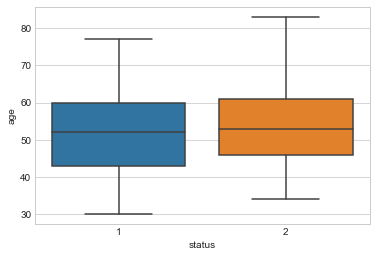

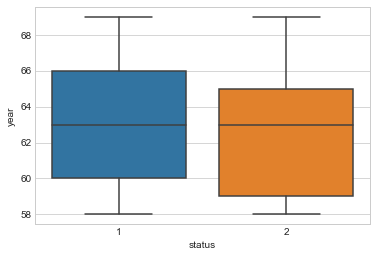

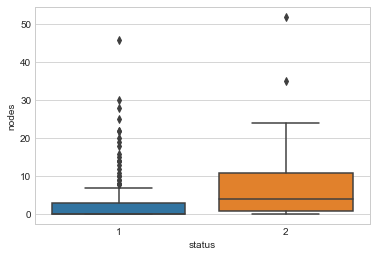

In [24]:

sns.boxplot(x='status',y='age', data=df)
mat.show()
sns.boxplot(x='status',y='year', data=df)
mat.show()
sns.boxplot(x='status',y='nodes', data=df)
mat.show()

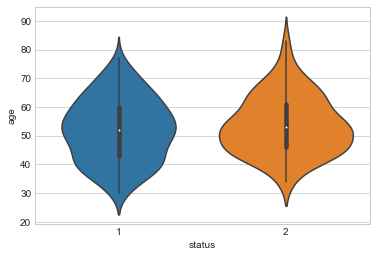

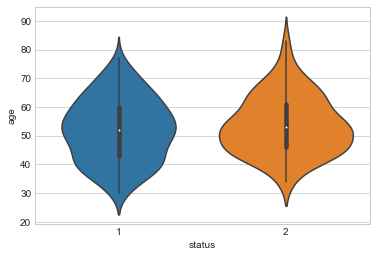

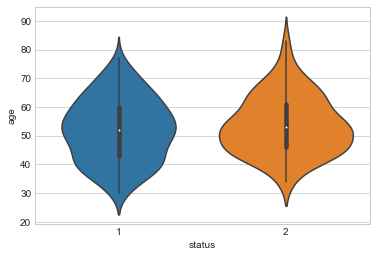

In [25]:
sns.violinplot(x='status',y='age', data=df)
mat.show()
sns.violinplot(x='status',y='age', data=df)
mat.show()
sns.violinplot(x='status',y='age', data=df)
mat.show()

CONCLUSIONS- 
1 -So overall with passage of years less number of patients are recorded to be sufferring from breast cancer.
2- Patients with less no of +vly detected nodes stand better chance to survive for more than 5 years after the operation
3- Patients in age group of 45-65 are more and patients in this age group are more often found not to survive more than 5 years after  operation.